Reading data--Importing python libraries & reading csv files

In [8]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# import xgboost as xgb



new_directory = 'D:/Sugandha/Machine_Learning/Titanci-ML_from_Disaster'
os.chdir(new_directory)
print(os.getcwd())

tr_df = pd.read_csv('train.csv')
te_df = pd.read_csv('test.csv')
print(tr_df)
print(te_df)

D:\Sugandha\Machine_Learning\Titanci-ML_from_Disaster
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..             

Data pre processing & data analysis--classify numerical,categorical features & plot their distribution 

                 Feature         Type  NaN Count      % NaN  % real_value
PassengerId  PassengerId    Numerical          0   0.000000    100.000000
Survived        Survived    Numerical          0   0.000000    100.000000
Pclass            Pclass    Numerical          0   0.000000    100.000000
Age                  Age    Numerical        177  19.865320     80.134680
SibSp              SibSp    Numerical          0   0.000000    100.000000
Parch              Parch    Numerical          0   0.000000    100.000000
Fare                Fare    Numerical          0   0.000000    100.000000
Name                Name  Categorical          0   0.000000    100.000000
Sex                  Sex  Categorical          0   0.000000    100.000000
Ticket            Ticket  Categorical          0   0.000000    100.000000
Cabin              Cabin  Categorical        687  77.104377     22.895623
Embarked        Embarked  Categorical          2   0.224467     99.775533


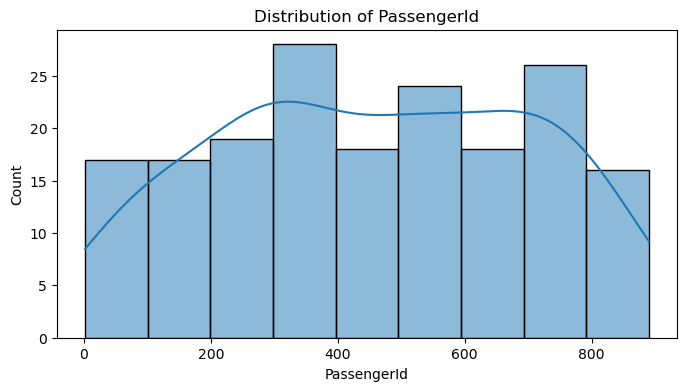

Descriptive statistics for PassengerId:
 count    183.000000
mean     455.366120
std      247.052476
min        2.000000
25%      263.500000
50%      457.000000
75%      676.000000
max      890.000000
Name: PassengerId, dtype: float64


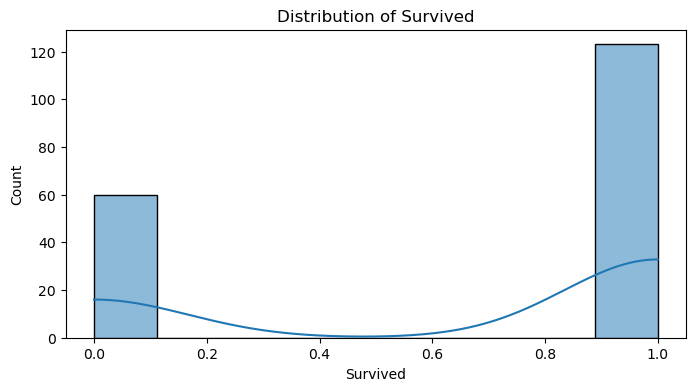

Descriptive statistics for Survived:
 count    183.000000
mean       0.672131
std        0.470725
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


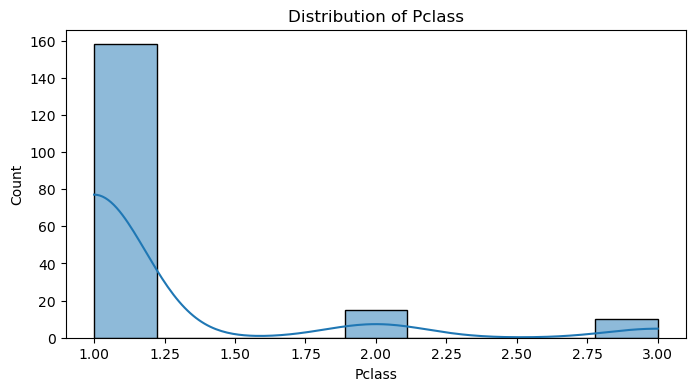

Descriptive statistics for Pclass:
 count    183.000000
mean       1.191257
std        0.515187
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Pclass, dtype: float64


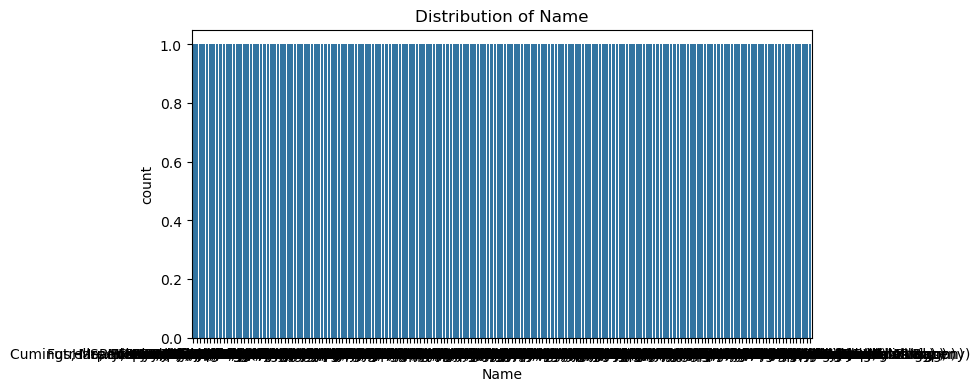

Value counts for Name:
 Name
Cumings, Mrs. John Bradley (Florence Briggs Thayer)     1
Appleton, Mrs. Edward Dale (Charlotte Lamson)           1
Silvey, Mrs. William Baird (Alice Munger)               1
Thayer, Mrs. John Borland (Marian Longstreth Morris)    1
Ross, Mr. John Hugo                                     1
                                                       ..
Ball, Mrs. (Ada E Hall)                                 1
Hippach, Miss. Jean Gertrude                            1
Partner, Mr. Austen                                     1
Graham, Mr. George Edward                               1
Behr, Mr. Karl Howell                                   1
Name: count, Length: 183, dtype: int64


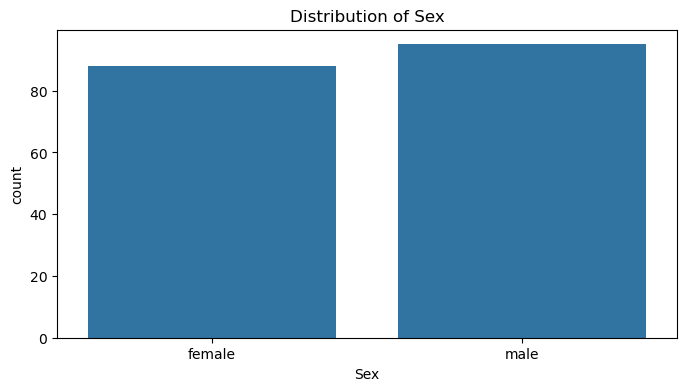

Value counts for Sex:
 Sex
male      95
female    88
Name: count, dtype: int64


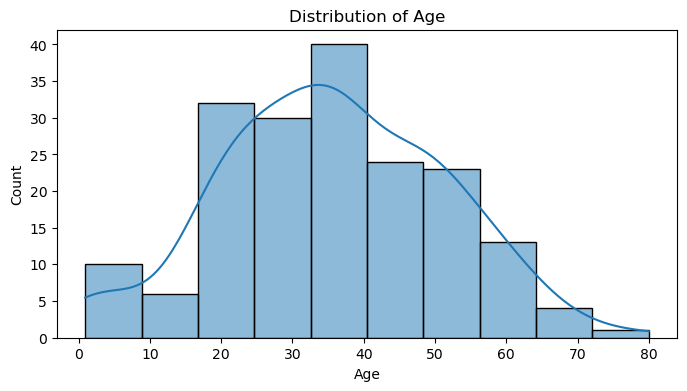

Descriptive statistics for Age:
 count    183.000000
mean      35.674426
std       15.643866
min        0.920000
25%       24.000000
50%       36.000000
75%       47.500000
max       80.000000
Name: Age, dtype: float64


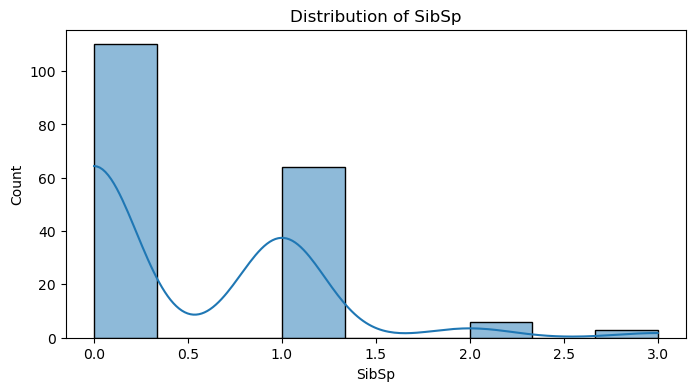

Descriptive statistics for SibSp:
 count    183.000000
mean       0.464481
std        0.644159
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: SibSp, dtype: float64


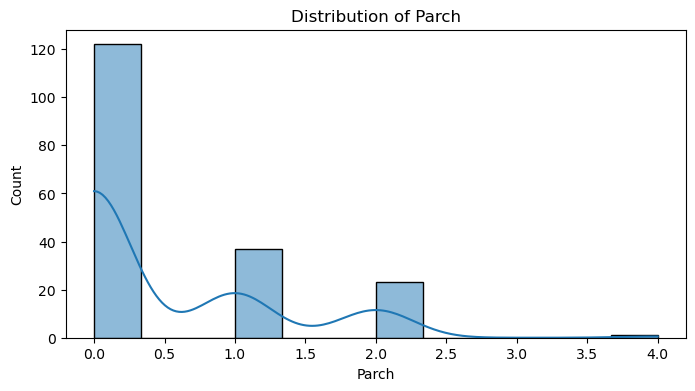

Descriptive statistics for Parch:
 count    183.000000
mean       0.475410
std        0.754617
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: Parch, dtype: float64


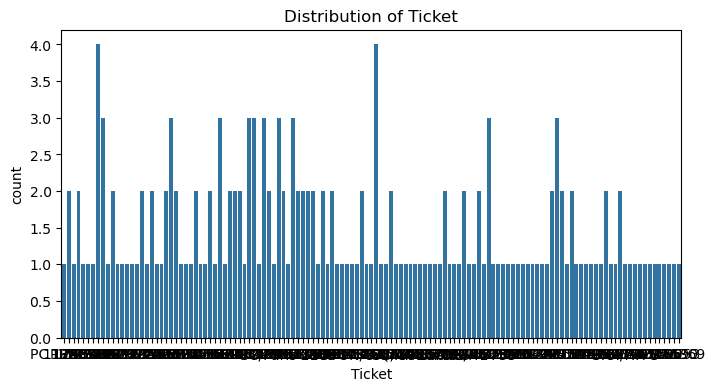

Value counts for Ticket:
 Ticket
113760      4
19950       4
PC 17582    3
35273       3
24160       3
           ..
113784      1
113043      1
28551       1
36928       1
111369      1
Name: count, Length: 127, dtype: int64


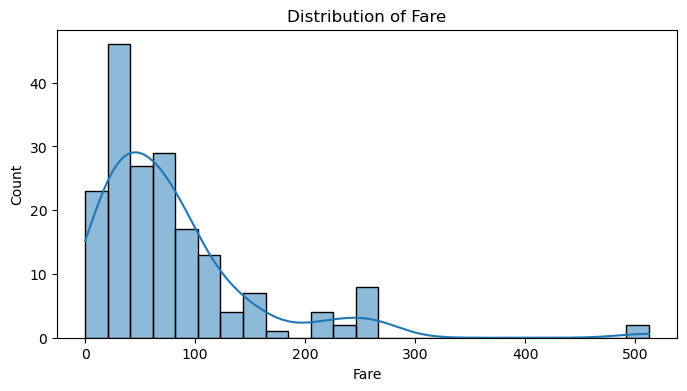

Descriptive statistics for Fare:
 count    183.000000
mean      78.682469
std       76.347843
min        0.000000
25%       29.700000
50%       57.000000
75%       90.000000
max      512.329200
Name: Fare, dtype: float64


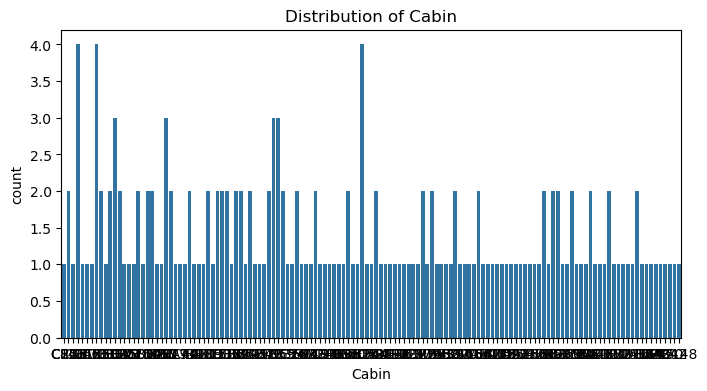

Value counts for Cabin:
 Cabin
G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
C124           1
C32            1
E34            1
C148           1
Name: count, Length: 133, dtype: int64


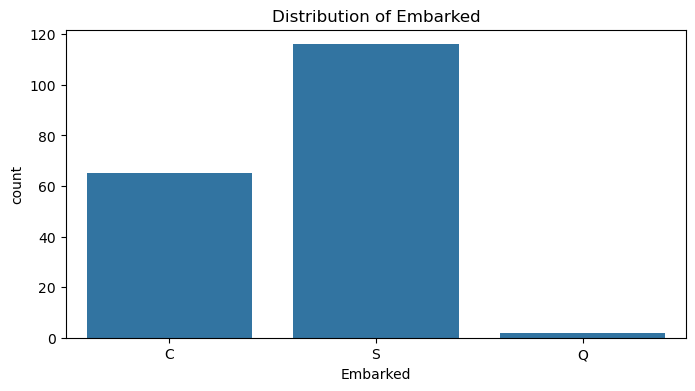

Value counts for Embarked:
 Embarked
S    116
C     65
Q      2
Name: count, dtype: int64
None


In [10]:
def features_summary(data_frame):
  """
  Creates a table summarizing numerical and categorical features.

  Args:
    file_path: Path to the CSV file or data frame in which csv data is stored.

  Returns:
    A pandas DataFrame containing feature type and count.
  """

  # Segregating numerical & categorical columns
  numerical_cols = tr_df.select_dtypes(include=np.number).columns
  categorical_cols = tr_df.select_dtypes(exclude=np.number).columns

  # Create separate DataFrames for numerical and categorical features
  numerical_df = tr_df.select_dtypes(include=np.number)
  categorical_df = tr_df.select_dtypes(exclude=np.number)
  combined_df = pd.concat([numerical_df, categorical_df], axis=1)

  # Convert Index objects to Series
  all_cols = pd.Series(list(numerical_cols) + list(categorical_cols))

  #Finding missing values in training dataframe
  # print(tr_df.isnull())

  #finding nan count of particular feature
  # nan_count_age = tr_df['Age'].isnull().sum()
  # nan_count_embarked = tr_df['Embarked'].isnull().sum()
 
  # Count NaN values in each column &total rows in data frame
  nan_counts = combined_df.isnull().sum()
  total_rows = len(data_frame)

  # Calculate percentage of NaN values
  percent_nan = (nan_counts / total_rows) * 100
  feature_summary = pd.DataFrame({'Feature': all_cols})

  # Create feature summary DataFrame
  feature_nan_summary = pd.DataFrame({
      'Feature':list(numerical_cols) + list(categorical_cols),
      'Type': np.where(feature_summary['Feature'].isin(numerical_cols), 'Numerical', 'Categorical'),
      'NaN Count': nan_counts,
      '% NaN': percent_nan,
      '% real_value':100- percent_nan,

  })
  print(feature_nan_summary)
  
  # Handle NaN values (consider alternative approaches if needed)
  data_frame_cleaned = tr_df.dropna(subset=numerical_cols)  # Drop rows with NaN in numerical columns
  # data_frame_cleaned = data_frame_cleaned.fillna(value="NA")  # Replace NaN in categorical columns with "NA" (adjust as needed)
  data_frame_cleaned = data_frame_cleaned.dropna(subset=categorical_cols)  # Drop rows with NaN in numerical columns
    
  # Distribution analysis
  for col in data_frame_cleaned.columns:
      if col in numerical_cols:
         plt.figure(figsize=(8, 4))
         sns.histplot(data_frame_cleaned[col], kde=True)
         plt.title(f'Distribution of {col}')
         plt.show()
         # Add descriptive statistics
         print(f"Descriptive statistics for {col}:\n", data_frame_cleaned[col].describe())
      else:
         plt.figure(figsize=(8, 4))
         sns.countplot(x=col, data=data_frame_cleaned)
         plt.title(f'Distribution of {col}')
         plt.show()
         # Add value counts
         print(f"Value counts for {col}:\n", data_frame_cleaned[col].value_counts())
  # return feature_nan_summary
           
summary_table = features_summary(tr_df)
print(summary_table) 



  

Fitting the model

In [363]:
# Handle missing values 
Strategy_type = input('Enter the strategy type:')
if Strategy_type == 'A':
   imputer = SimpleImputer(strategy='median')
   tr_df['Age'] = imputer.fit_transform(tr_df[['Age']])

   # Fill missing 'Embarked' with the most frequent value
   tr_df['Embarked'] = tr_df['Embarked'].fillna(tr_df['Embarked'].mode()[0])

   # Drop the 'Cabin' column due to high number of missing values
   tr_df.drop('Cabin', axis=1, inplace=True)
   print(Strategy_type)

elif Strategy_type == 'B':
    tr_df = tr_df.dropna()
    print(tr_df)
    # tr_df.fillna(method='ffill', inplace=True)  # Example: Forward fill missing
    # Drop the 'Cabin' column due to high number of missing values
    tr_df.drop('Cabin', axis=1, inplace=True)
    print(Strategy_type)

else:
    tr_df.fillna(method='ffill', inplace=True)  # Example: Forward fill missing
    # Drop the 'Cabin' column due to high number of missing values
    tr_df.drop('Cabin', axis=1, inplace=True)

    
# Extract features (all columns except the target variable & unnecessary features)
X_train = tr_df.drop(['Survived','PassengerId','Name'],axis=1)
# print(type(X_train))

# Extract target variable
y_train = tr_df['Survived']

# Separate numerical and categorical features
numerical_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_cols = ['Sex', 'Ticket','Embarked']

Enter the strategy type: A


A


In [364]:
list(X_train)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']

Scale numerical features

In [365]:
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

Encode categorical features

In [366]:
# For simplicity, we'll use label encoding for 'Sex' and 'Embarked'
# For 'Ticket' and 'Cabin', consider feature engineering or dropping due to high cardinality
label_encoder = LabelEncoder()
X_train['Sex'] = label_encoder.fit_transform(X_train['Sex'])
X_train['Embarked'] = label_encoder.fit_transform(X_train['Embarked'])
X_train['Ticket'] = label_encoder.fit_transform(X_train['Ticket'])
#X_train['Cabin'] = label_encoder.fit_transform(X_train['Cabin'])

In [367]:
column_names = X_train.columns.tolist()
print(column_names)


['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


Splitting training set into 2 subsets--taring set & test set


In [368]:
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Fitting the model

In [369]:
training_strategy = input('Enter the strategy type:')

# Create a model instance
if training_strategy == 'L':
    model = LogisticRegression()  # Replace with your desired model
    # Train the model
    model.fit(X_train_set, y_train_set)
    print(training_strategy)
elif training_strategy == 'R':
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    # Train the model
    model.fit(X_train_set, y_train_set)
    print(training_strategy)
elif training_strategy == 'X':
    model = xgb.XGBClassifier()    
    # Train the model
    model.fit(X_train_set, y_train_set)
    print(training_strategy)  
else:
    # Create a decision tree classifier
    model = DecisionTreeClassifier()
    # Train the model
    model.fit(X_train_set, y_train_set)
    print(training_strategy)


Enter the strategy type: X


X


Make predictions

In [370]:
y_pred = model.predict(X_test_set)
print(y_pred)


[0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0
 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1]


In [371]:
# Evaluate model performance
accuracy = accuracy_score(y_test_set, y_pred)
precision = precision_score(y_test_set, y_pred)
recall = recall_score(y_test_set, y_pred)
f1 = f1_score(y_test_set, y_pred)
confusion_matrix = confusion_matrix(y_test_set, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n",confusion_matrix)


Accuracy: 0.7932960893854749
Precision: 0.7681159420289855
Recall: 0.7162162162162162
F1-score: 0.7412587412587412
Confusion Matrix:
 [[89 16]
 [21 53]]


Calculating survival rate & mortality rate

In [355]:
# Assuming 'data' is your Titanic DataFrame with a 'Survived' column
survival_count = tr_df['Survived'].sum()
total_passengers = len(tr_df)

survival_rate = survival_count / total_passengers
mortality_rate = 1 - survival_rate

print("Survival Rate:", survival_rate)
print("Mortality Rate:", mortality_rate)


Survival Rate: 0.3838383838383838
Mortality Rate: 0.6161616161616161
